[View in Colaboratory](https://colab.research.google.com/github/datamsh/data/blob/master/deeplearning_for_all.ipynb)

# Lab 02 linear regression

In [0]:
import tensorflow as tf

In [0]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [4]:
# train
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                 feed_dict={X: [1, 2, 3, 4, 5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)


(0, 93.06808, array([-0.6524318], dtype=float32), array([-0.9381666], dtype=float32))
(20, 0.3467074, array([1.3706456], dtype=float32), array([-0.2743004], dtype=float32))
(40, 0.30113113, array([1.3550208], dtype=float32), array([-0.18190074], dtype=float32))
(60, 0.26297992, array([1.331809], dtype=float32), array([-0.09793717], dtype=float32))
(80, 0.22966246, array([1.310079], dtype=float32), array([-0.01948331], dtype=float32))
(100, 0.20056593, array([1.2897717], dtype=float32), array([0.05383254], dtype=float32))
(120, 0.1751557, array([1.2707943], dtype=float32), array([0.12234692], dtype=float32))
(140, 0.15296479, array([1.2530596], dtype=float32), array([0.18637419], dtype=float32))
(160, 0.13358529, array([1.2364866], dtype=float32), array([0.24620827], dtype=float32))
(180, 0.116661035, array([1.220999], dtype=float32), array([0.30212376], dtype=float32))
(200, 0.10188092, array([1.2065256], dtype=float32), array([0.35437736], dtype=float32))
(220, 0.08897334, array([1.19

In [5]:
# test
print(sess.run(hypothesis, feed_dict={X: [5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

[6.100647]
[3.599484]
[2.5990186 4.599949 ]


# Lab 03 linear regression의 cost최소화

In [0]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]
          
W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
          
hypothesis = X * W
          
cost = tf.reduce_mean(tf.square(hypothesis - Y))
          
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)  
          

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

(0, 4.323433, array([0.03747731], dtype=float32))
(1, 1.2297764, array([0.48665458], dtype=float32))
(2, 0.3498031, array([0.7262158], dtype=float32))
(3, 0.09949956, array([0.85398173], dtype=float32))
(4, 0.02830209, array([0.9221236], dtype=float32))
(5, 0.0080503775, array([0.95846593], dtype=float32))
(6, 0.0022898756, array([0.97784853], dtype=float32))
(7, 0.0006513424, array([0.9881859], dtype=float32))
(8, 0.00018527021, array([0.99369913], dtype=float32))
(9, 5.269852e-05, array([0.99663955], dtype=float32))
(10, 1.4990328e-05, array([0.99820775], dtype=float32))
(11, 4.2640754e-06, array([0.9990441], dtype=float32))
(12, 1.2129019e-06, array([0.9994902], dtype=float32))
(13, 3.4511126e-07, array([0.9997281], dtype=float32))
(14, 9.8158445e-08, array([0.999855], dtype=float32))
(15, 2.7951373e-08, array([0.99992263], dtype=float32))
(16, 7.939245e-09, array([0.99995875], dtype=float32))
(17, 2.2600812e-09, array([0.999978], dtype=float32))
(18, 6.448282e-10, array([0.99998826

In [0]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]
W = tf.Variable(5.0)

hypothesis = X * W

#get gradients by hand
gradient = tf.reduce_mean((W * X - Y) * X) * 2

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#get gradients from GradientDescentOptimizer
gvs = optimizer.compute_gradients(cost, [W])

apply_gradients = optimizer.apply_gradients(gvs)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients) # equal to sess.run(train)

(0, [37.333332, 5.0, [(37.333336, 5.0)]])
(1, [33.84889, 4.6266665, [(33.84889, 4.6266665)]])
(2, [30.689657, 4.2881775, [(30.689657, 4.2881775)]])
(3, [27.825289, 3.981281, [(27.825289, 3.981281)]])
(4, [25.228264, 3.7030282, [(25.228264, 3.7030282)]])
(5, [22.873625, 3.4507456, [(22.873627, 3.4507456)]])
(6, [20.738754, 3.2220094, [(20.738754, 3.2220094)]])
(7, [18.803139, 3.014622, [(18.803139, 3.014622)]])
(8, [17.04818, 2.8265905, [(17.04818, 2.8265905)]])
(9, [15.457016, 2.6561089, [(15.457016, 2.6561089)]])
(10, [14.014362, 2.5015388, [(14.014362, 2.5015388)]])
(11, [12.706355, 2.3613951, [(12.706355, 2.3613951)]])
(12, [11.520428, 2.2343316, [(11.520429, 2.2343316)]])
(13, [10.445188, 2.1191273, [(10.4451885, 2.1191273)]])
(14, [9.470304, 2.0146754, [(9.4703045, 2.0146754)]])
(15, [8.586408, 1.9199723, [(8.586408, 1.9199723)]])
(16, [7.78501, 1.8341082, [(7.7850103, 1.8341082)]])
(17, [7.058409, 1.7562581, [(7.0584097, 1.7562581)]])
(18, [6.3996243, 1.6856741, [(6.399625, 1.685

# Lab 04-1 multi variable linear regression

In [0]:
import tensorflow as tf

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [7]:
# train
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

(0, 'Cost: ', 459.23886, '\nPrediction:\n', array([170.89334, 207.4402 , 203.75024, 217.33385, 162.4075 ],
      dtype=float32))
(10, 'Cost: ', 4.134131, '\nPrediction:\n', array([152.02444, 184.75586, 181.4017 , 192.99744, 145.10327],
      dtype=float32))
(20, 'Cost: ', 4.124756, '\nPrediction:\n', array([151.97011, 184.6852 , 181.3348 , 192.92519, 145.04756],
      dtype=float32))
(30, 'Cost: ', 4.119647, '\nPrediction:\n', array([151.97273, 184.68303, 181.33534, 192.92635, 145.0441 ],
      dtype=float32))
(40, 'Cost: ', 4.1145067, '\nPrediction:\n', array([151.9755 , 184.68109, 181.33612, 192.92776, 145.04079],
      dtype=float32))
(50, 'Cost: ', 4.109334, '\nPrediction:\n', array([151.97824, 184.67911, 181.3368 , 192.92917, 145.03746],
      dtype=float32))
(60, 'Cost: ', 4.104266, '\nPrediction:\n', array([151.98096, 184.67715, 181.33754, 192.93053, 145.03415],
      dtype=float32))
(70, 'Cost: ', 4.0991335, '\nPrediction:\n', array([151.9837 , 184.6752 , 181.33827, 192.93196, 

In [0]:
# with matrix
import tensorflow as tf

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

(0, 'Cost: ', 115.45244, '\nPrediction:\n', array([[167.83044],
       [188.07433],
       [192.43558],
       [208.68733],
       [140.73677]], dtype=float32))
(10, 'Cost: ', 38.217987, '\nPrediction:\n', array([[160.04257],
       [178.75905],
       [183.23358],
       [198.6691 ],
       [133.64073]], dtype=float32))
(20, 'Cost: ', 38.01236, '\nPrediction:\n', array([[159.99524],
       [178.74718],
       [183.19849],
       [198.63335],
       [133.64085]], dtype=float32))
(30, 'Cost: ', 37.808643, '\nPrediction:\n', array([[159.97139],
       [178.76341],
       [183.19115],
       [198.6278 ],
       [133.66235]], dtype=float32))
(40, 'Cost: ', 37.605965, '\nPrediction:\n', array([[159.94768],
       [178.7797 ],
       [183.18391],
       [198.62239],
       [133.68388]], dtype=float32))
(50, 'Cost: ', 37.404274, '\nPrediction:\n', array([[159.92401],
       [178.79594],
       [183.1767 ],
       [198.61697],
       [133.70535]], dtype=float32))
(60, 'Cost: ', 37.203747, '\nP

# Lab 04-2 read data

In [4]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)



OSError: ignored

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

# Ask score
print("Your score will be ", sess.run(
    hypothesis, feed_dict={X: [[100, 70, 101]]}))

print("Other scores will be ", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


In [18]:
# read data with reader

import tensorflow as tf

filename_queue = tf.train.string_input_producer(
    ['data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the
# decoded result.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv in
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# train
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

coord.request_stop()
coord.join(threads)

# Ask my score
print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

print("Other scores will be ",
      sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.NotFoundError'>, data-01-test-score.csv; No such file or directory
	 [[{{node ReaderReadV2}} = ReaderReadV2[_device="/job:localhost/replica:0/task:0/device:CPU:0"](TextLineReaderV2, filename_queue)]]


OutOfRangeError: ignored

# Lab 05 logistic classification

In [0]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [3]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)


0 1.7307833
200 0.5715119
400 0.5074139
600 0.4718242
800 0.44758478
1000 0.42857108
1200 0.41232458
1400 0.39775506
1600 0.38433787
1800 0.3718011
2000 0.35999325
2200 0.34882212
2400 0.33822623
2600 0.32816055
2800 0.31858906
3000 0.3094809
3200 0.30080858
3400 0.29254708
3600 0.2846729
3800 0.277164
4000 0.26999974
4200 0.26316062
4400 0.2566282
4600 0.25038517
4800 0.24441512
5000 0.23870277
5200 0.23323368
5400 0.22799428
5600 0.22297199
5800 0.21815479
6000 0.2135316
6200 0.20909168
6400 0.20482557
6600 0.20072377
6800 0.19677775
7000 0.19297932
7200 0.18932098
7400 0.18579555
7600 0.1823964
7800 0.17911719
8000 0.17595188
8200 0.17289507
8400 0.16994147
8600 0.16708624
8800 0.16432473
9000 0.16165252
9200 0.15906551
9400 0.1565599
9600 0.15413195
9800 0.15177831
10000 0.1494956

Hypothesis:  [[0.03074029]
 [0.15884677]
 [0.30486736]
 [0.78138196]
 [0.93957496]
 [0.9801688 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


In [0]:
# with csv data
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

# Lab 06-1 softmax classifier

In [0]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


In [2]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

    print('--------------')

    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.argmax(a, 1)))

    print('--------------')

    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print(b, sess.run(tf.argmax(b, 1)))

    print('--------------')

    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print(c, sess.run(tf.argmax(c, 1)))

    print('--------------')

    all = sess.run(hypothesis, feed_dict={
                   X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.argmax(all, 1)))

0 5.0486245
200 0.54842514
400 0.4321485
600 0.3524667
800 0.27682948
1000 0.23268288
1200 0.21055318
1400 0.19221497
1600 0.176752
1800 0.16353425
2000 0.15210828
--------------
[[1.3890372e-03 9.9860197e-01 9.0613012e-06]] [1]
--------------
[[0.93119216 0.062902   0.0059059 ]] [0]
--------------
[[1.2732767e-08 3.3411290e-04 9.9966586e-01]] [2]
--------------
[[1.3890372e-03 9.9860197e-01 9.0613012e-06]
 [9.3119216e-01 6.2902004e-02 5.9058964e-03]
 [1.2732768e-08 3.3411290e-04 9.9966586e-01]] [1 0 2]


# Lab 06-2 softmax classifier fancy

In [3]:
# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6
Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape", Y_one_hot)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                 labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1)) #label 로 다시 바꿔서 맞는지 확인
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



OSError: ignored

In [0]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2000):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={
                                 X: x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):  #  [[1],[2]] -> [1,2]
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))



# Lab 07-1 learning rate

In [0]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]


# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=1e-10).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))


In [4]:
# Non-normalized input
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  202763140000.0 
Prediction:
 [[317916.56]
 [640900.6 ]
 [503989.47]
 [353036.34]
 [416224.44]
 [419735.3 ]
 [384636.94]
 [489957.25]]
1 Cost:  2.2277174e+26 
Prediction:
 [[-1.0528375e+13]
 [-2.1194699e+13]
 [-1.6673105e+13]
 [-1.1687758e+13]
 [-1.3774648e+13]
 [-1.3890586e+13]
 [-1.2731203e+13]
 [-1.6209351e+13]]
2 Cost:  inf 
Prediction:
 [[3.4897721e+20]
 [7.0252692e+20]
 [5.5265258e+20]
 [3.8740650e+20]
 [4.5657929e+20]
 [4.6042220e+20]
 [4.2199284e+20]
 [5.3728081e+20]]
3 Cost:  inf 
Prediction:
 [[-1.1567321e+28]
 [-2.3286202e+28]
 [-1.8318414e+28]
 [-1.2841111e+28]
 [-1.5133936e+28]
 [-1.5261314e+28]
 [-1.3987523e+28]
 [-1.7808898e+28]]
4 Cost:  inf 
Prediction:
 [[3.8341443e+35]
 [7.7185264e+35]
 [6.0718855e+35]
 [4.2563595e+35]
 [5.0163474e+35]
 [5.0585688e+35]
 [4.6363532e+35]
 [5.9029996e+35]]
5 Cost:  inf 
Prediction:
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]
 [-inf]]
6 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]

In [5]:
# normalized input
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility


def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# very important. It does not work without it.
xy = MinMaxScaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

'''
100 Cost:  0.152254
Prediction:
 [[ 1.63450289]
 [ 0.06628087]
 [ 0.35014752]
 [ 0.67070574]
 [ 0.61131608]
 [ 0.61466062]
 [ 0.23175186]
 [-0.13716528]]

'''


[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
0 Cost:  1.9350178 
Prediction:
 [[-0.39691156]
 [-0.8122306 ]
 [-0.87389004]
 [-0.9506413 ]
 [-0.8541245 ]
 [-0.8200766 ]
 [-1.1378905 ]
 [-1.1867466 ]]
1 Cost:  1.9348749 
Prediction:
 [[-0.3968436 ]
 [-0.81216335]
 [-0.8738337 ]
 [-0.95059735]
 [-0.8540728 ]
 [-0.82002664]
 [-1.1378558 ]
 [-1.1867121 ]]
2 Cost:  1.934732 
Prediction:
 [[-0.39677566]
 [-0.812096  ]
 [-0.87377745]
 [-0.9505534 ]
 [-0.8540212 ]
 [-0.81997657]
 [-1.1378212 ]
 [-1.1866777 ]]
3 Cost:  1.934589 
Prediction:
 [[-0.3967077]
 [-0.8120289]
 [-0.8737211]


'\n100 Cost:  0.152254\nPrediction:\n [[ 1.63450289]\n [ 0.06628087]\n [ 0.35014752]\n [ 0.67070574]\n [ 0.61131608]\n [ 0.61466062]\n [ 0.23175186]\n [-0.13716528]]\n\n'

# Lab 07-2 mnist dataset


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

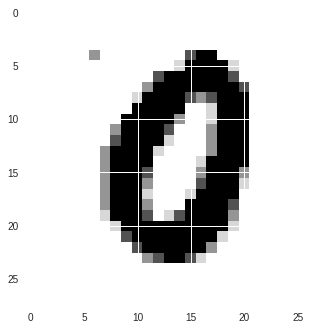

In [6]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)    # 10000/100 = 100

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={ # == sess.run()
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()



# Lab 08 tensor manipulation

In [7]:
# https://www.tensorflow.org/api_guides/python/array_ops
import tensorflow as tf
import numpy as np
import pprint
tf.set_random_seed(777)  # for reproducibility

pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()

# simple Array
t = np.array([0., 1., 2., 3., 4., 5., 6.])
pp.pprint(t)
print(t.ndim) # rank
print(t.shape) # shape
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1])
print(t[:2], t[3:])

array([0., 1., 2., 3., 4., 5., 6.])
1
(7,)
0.0 1.0 6.0
[2. 3. 4.] [4. 5.]
[0. 1.] [3. 4. 5. 6.]


In [8]:
# 2d Array
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
pp.pprint(t)
print(t.ndim) # rank
print(t.shape) # shape

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])
2
(4, 3)


In [13]:
# Shape
t = tf.constant([1,2,3,4])
tf.shape(t).eval()

array([4], dtype=int32)

In [14]:
t = tf.constant([[1,2],
                 [3,4]])
tf.shape(t).eval()

array([2, 2], dtype=int32)

In [15]:
t = tf.constant([[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],[[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]])
tf.shape(t).eval()

array([1, 2, 3, 4], dtype=int32)

In [16]:
[
    [
        [
            [1,2,3,4], 
            [5,6,7,8],
            [9,10,11,12]
        ],
        [
            [13,14,15,16],
            [17,18,19,20], 
            [21,22,23,24]
        ]
    ]
]

[[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
  [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]]

In [17]:
# Matmul VS multiply
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
tf.matmul(matrix1, matrix2).eval()

array([[12.]], dtype=float32)

In [18]:
(matrix1*matrix2).eval()

array([[6., 6.],
       [6., 6.]], dtype=float32)

In [19]:
# Watch out broadcasting

matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
(matrix1+matrix2).eval()

array([[5., 5.],
       [5., 5.]], dtype=float32)

In [20]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2., 2.]])
(matrix1+matrix2).eval()

array([[5., 5.]], dtype=float32)

In [21]:
# Random values for variable initializations
tf.random_normal([3]).eval()

array([-0.52225876,  0.29547122, -0.18726087], dtype=float32)

In [22]:
tf.random_uniform([2]).eval()

array([0.6269007 , 0.42165887], dtype=float32)

In [23]:
tf.random_uniform([2, 3]).eval()

array([[0.01693988, 0.02535522, 0.98598254],
       [0.6859937 , 0.6472193 , 0.3358134 ]], dtype=float32)

In [24]:
# Reduce Mean/Sum
tf.reduce_mean([1, 2], axis=0).eval()

1

In [25]:
x = [[1., 2.],
     [3., 4.]]


tf.reduce_mean(x).eval()

2.5

In [26]:
tf.reduce_mean(x, axis=0).eval()

array([2., 3.], dtype=float32)

In [27]:
tf.reduce_mean(x, axis=1).eval()

array([1.5, 3.5], dtype=float32)

In [28]:
tf.reduce_mean(x, axis=-1).eval()

array([1.5, 3.5], dtype=float32)

In [29]:
tf.reduce_sum(x).eval()

10.0

In [30]:
tf.reduce_sum(x, axis=0).eval()

array([4., 6.], dtype=float32)

In [31]:
tf.reduce_sum(x, axis=-1).eval()

array([3., 7.], dtype=float32)

In [32]:
tf.reduce_mean(tf.reduce_sum(x, axis=-1)).eval()

5.0

In [33]:
# Argmax with axis
x = [[0, 1, 2],
     [2, 1, 0]]
tf.argmax(x, axis=0).eval()

array([1, 0, 0])

In [34]:
tf.argmax(x, axis=1).eval()

array([2, 0])

In [35]:
tf.argmax(x, axis=-1).eval()

array([2, 0])

In [36]:
# Reshape, squeeze, expand_dims
t = np.array([[[0, 1, 2], 
               [3, 4, 5]],
              
              [[6, 7, 8], 
               [9, 10, 11]]])
t.shape

(2, 2, 3)

In [37]:
tf.reshape(t, shape=[-1, 3]).eval()

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [38]:
tf.reshape(t, shape=[-1, 1, 3]).eval()

array([[[ 0,  1,  2]],

       [[ 3,  4,  5]],

       [[ 6,  7,  8]],

       [[ 9, 10, 11]]])

In [39]:
tf.squeeze([[0], [1], [2]]).eval()

array([0, 1, 2], dtype=int32)

In [40]:
tf.expand_dims([0, 1, 2], 1).eval()

array([[0],
       [1],
       [2]], dtype=int32)

In [42]:
tf.expand_dims([0, 1, 2], 0).eval()

array([[0, 1, 2]], dtype=int32)

In [43]:
tf.expand_dims([[0, 1, 2]], 2).eval()

array([[[0],
        [1],
        [2]]], dtype=int32)

In [44]:
#One hot
tf.one_hot([[0], [1], [2], [0]], depth=3).eval()

array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[1., 0., 0.]]], dtype=float32)

In [47]:
tf.one_hot([[0], [1], [2], [0]], depth=2).eval()

array([[[1., 0.]],

       [[0., 1.]],

       [[0., 0.]],

       [[1., 0.]]], dtype=float32)

In [48]:
t = tf.one_hot([[0], [1], [2], [0]], depth=3)
tf.reshape(t, shape=[-1, 3]).eval()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [49]:
# casting
tf.cast([1.8, 2.2, 3.3, 4.9], tf.int32).eval()

array([1, 2, 3, 4], dtype=int32)

In [50]:
tf.cast([True, False, 1 == 1, 0 == 1], tf.int32).eval()

array([1, 0, 1, 0], dtype=int32)

In [62]:
# stack
x = [1, 4]
y = [2, 5]
z = [3, 6]

# Pack along first dim.
tf.stack([x, y, z]).eval()

array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)

In [52]:
tf.stack([x, y, z], axis=1).eval()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [53]:
tf.stack([x, y, z], axis=-1).eval()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [63]:
pp.pprint(tf.stack([x, y, z], axis=0).eval())

array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)


In [56]:
#Ones like and Zeros like
x = [[0, 1, 2],
     [2, 1, 0]]

tf.ones_like(x).eval()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

In [57]:
tf.zeros_like(x).eval()

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [58]:
# zip
for x, y in zip([1, 2, 3], [4, 5, 6]):
    print(x, y)

1 4
2 5
3 6


In [59]:
for x, y, z in zip([1, 2, 3], [4, 5, 6], [7, 8, 9]):
    print(x, y, z)

1 4 7
2 5 8
3 6 9


In [64]:
# Transpose
t = np.array([[[0, 1, 2], [3, 4, 5]], [[6, 7, 8], [9, 10, 11]]])
pp.pprint(t.shape)
pp.pprint(t)
t

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])


array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [66]:
t1 = tf.transpose(t, [1, 0, 2])
pp.pprint(sess.run(t1).shape)
pp.pprint(sess.run(t1))
sess.run(t1)

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 6,  7,  8]],

       [[ 3,  4,  5],
        [ 9, 10, 11]]])


array([[[ 0,  1,  2],
        [ 6,  7,  8]],

       [[ 3,  4,  5],
        [ 9, 10, 11]]])

In [67]:
t = tf.transpose(t1, [1, 0, 2])
pp.pprint(sess.run(t).shape)
pp.pprint(sess.run(t))

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])


In [68]:
t2 = tf.transpose(t, [1, 2, 0])
pp.pprint(sess.run(t2).shape)
pp.pprint(sess.run(t2))

(2, 3, 2)
array([[[ 0,  6],
        [ 1,  7],
        [ 2,  8]],

       [[ 3,  9],
        [ 4, 10],
        [ 5, 11]]])


In [69]:
t = tf.transpose(t2, [2, 0, 1])
pp.pprint(sess.run(t).shape)
pp.pprint(sess.run(t))

(2, 2, 3)
array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])


# Lab 09-1 neural net for xor

In [71]:
# xor with gradient descent -> not working
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run(W))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


0 0.97256464 [[-0.48217797]
 [ 2.2627037 ]]
100 0.7368923 [[-0.48181206]
 [ 1.094412  ]]
200 0.7071885 [[-0.23027472]
 [ 0.62746596]]
300 0.6976629 [[-0.09613361]
 [ 0.36467507]]
400 0.69464666 [[-0.03256409]
 [ 0.21401508]]
500 0.6936693 [[-0.00463383]
 [ 0.12715611]]
600 0.693339 [[0.00614843]
 [0.07656248]]
700 0.6932214 [[0.0091063 ]
 [0.04672402]]
800 0.6931772 [[0.00879414]
 [0.02889028]]
900 0.6931598 [[0.00735013]
 [0.01808579]]
1000 0.69315267 [[0.00571664]
 [0.01145178]]
1100 0.69314957 [[0.00426215]
 [0.00732592]]
1200 0.6931482 [[0.00309242]
 [0.00472912]]
1300 0.69314766 [[0.00220246]
 [0.00307681]]
1400 0.6931474 [[0.00154811]
 [0.0020152 ]]
1500 0.6931473 [[0.0010778 ]
 [0.00132732]]
1600 0.6931473 [[0.00074504]
 [0.00087833]]
1700 0.69314724 [[0.00051226]
 [0.00058346]]
1800 0.6931471 [[0.0003508 ]
 [0.00038883]]
1900 0.6931472 [[0.00023945]
 [0.00025977]]
2000 0.6931472 [[0.00016304]
 [0.00017389]]
2100 0.6931472 [[0.0001108]
 [0.0001166]]
2200 0.6931472 [[7.518835e-05

In [72]:
#   XOR with Neural Net 2 layer, activation = sigmoid
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.714956 [array([[ 0.42299828,  0.7690993 ],
       [-2.2643805 ,  0.64209306]], dtype=float32), array([[-0.06082584],
       [-0.92476076]], dtype=float32)]
100 0.6956737 [array([[ 0.42444545,  0.69069105],
       [-2.2651782 ,  0.5569778 ]], dtype=float32), array([[ 0.04545892],
       [-0.7467162 ]], dtype=float32)]
200 0.69492525 [array([[ 0.43049613,  0.644725  ],
       [-2.2673154 ,  0.50351787]], dtype=float32), array([[ 0.06605384],
       [-0.72268355]], dtype=float32)]
300 0.6943516 [array([[ 0.4386986 ,  0.60644585],
       [-2.2702959 ,  0.45735356]], dtype=float32), array([[ 0.08746203],
       [-0.705946  ]], dtype=float32)]
400 0.6938888 [array([[ 0.4492249 ,  0.5741962 ],
       [-2.2742035 ,  0.41668198]], dtype=float32), array([[ 0.1106868],
       [-0.6928701]], dtype=float32)]
500 0.6934959 [array([[ 0.46223027,  0.54694086],
       [-2.2791488 ,  0.3803371 ]], dtype=float32), array([[ 0.1354903],
       [-0.6825616]], dtype=float32)]
600 0.69314295 [array([[ 0.4

In [73]:
# Lab 9 XOR with wide nn, 4 layers sigmoid
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


'''
Hypothesis:  [[  7.80511764e-04]
 [  9.99238133e-01]
 [  9.98379230e-01]
 [  1.55659032e-03]]
Correct:  [[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]
Accuracy:  1.0
'''


0 0.6892961 [array([[ 0.67604715, -1.3824492 , -0.47149134,  0.74151176, -0.2681922 ,
         1.1935805 , -0.37605068, -1.1038052 ,  0.31791675, -1.2867223 ],
       [-1.1471688 ,  2.1413836 ,  0.0791313 , -0.39969814, -0.20890391,
        -0.20139706,  1.0517515 ,  0.9407134 ,  1.6775182 ,  1.4892335 ]],
      dtype=float32), array([[ 1.4367063 , -0.26535738, -0.13404647,  0.23656617, -0.7389631 ,
        -0.08732946,  0.9732781 ,  0.08041014,  0.7899283 , -0.6439127 ],
       [-0.5453174 , -0.0902575 ,  0.5086928 ,  0.14225988,  0.6717446 ,
        -1.6914386 , -0.02021252, -0.29591727, -1.7703502 ,  0.5417669 ],
       [ 0.46430385, -0.60017854, -0.35873586,  0.68039083,  0.80816287,
         0.59604454,  0.64506656,  0.16860245, -1.1758901 ,  0.64883316],
       [-0.82680374, -0.15286396,  0.56143785, -0.17703353, -0.67668635,
         0.34879938,  0.38215888, -0.6974327 ,  0.54277575,  0.568129  ],
       [-0.8298242 ,  2.3772657 ,  1.5346057 , -1.3120797 , -0.8382238 ,
         

'\nHypothesis:  [[  7.80511764e-04]\n [  9.99238133e-01]\n [  9.98379230e-01]\n [  1.55659032e-03]]\nCorrect:  [[ 0.]\n [ 1.]\n [ 1.]\n [ 0.]]\nAccuracy:  1.0\n'

# Lab 09-2 neural net for xor tensorboard

In [74]:
# Lab 9 XOR  # not working in here, colab
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.01

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

with tf.name_scope("layer1"):
    W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
    b1 = tf.Variable(tf.random_normal([2]), name='bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    w1_hist = tf.summary.histogram("weights1", W1)
    b1_hist = tf.summary.histogram("biases1", b1)
    layer1_hist = tf.summary.histogram("layer1", layer1)


with tf.name_scope("layer2"):
    W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    w2_hist = tf.summary.histogram("weights2", W2)
    b2_hist = tf.summary.histogram("biases2", b2)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("cost"):
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                           tf.log(1 - hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train"):
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        summary, _ = sess.run([merged_summary, train], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.91254544 [array([[-1.1104138 ,  1.0660052 ],
       [-0.18806468, -0.32957658]], dtype=float32), array([[-0.369256 ],
       [-0.2780816]], dtype=float32)]
100 0.69828415 [array([[-1.3015258 ,  1.2068617 ],
       [-0.3330809 , -0.47558594]], dtype=float32), array([[0.21841785],
       [0.461878  ]], dtype=float32)]
200 0.66590905 [array([[-1.5121827,  1.6672539],
       [ 0.7303995, -1.9976927]], dtype=float32), array([[0.50718135],
       [0.74188066]], dtype=float32)]
300 0.49779668 [array([[-3.6440227,  3.4426484],
       [ 2.6474462, -3.6803615]], dtype=float32), array([[1.7948236],
       [1.5278778]], dtype=float32)]
400 0.29906923 [array([[-5.100257 ,  4.813532 ],
       [ 4.173595 , -4.9511647]], dtype=float32), array([[3.2193794],
       [2.581344 ]], dtype=float32)]
500 0.18994495 [array([[-5.9547935,  5.706479 ],
       [ 5.0647125, -5.8122554]], dtype=float32), array([[4.219419],
       [3.489018]], dtype=float32)]
600 0.13139191 [array([[-6.5187244,  6.315741 ],
     

In [76]:
# http://blog.aloni.org/posts/backprop-with-tensorflow/
# https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.b3rvzhx89
# WIP 
# lab-09-5-linear_back_prop
import tensorflow as tf

tf.set_random_seed(777)  # reproducibility

# tf Graph Input
x_data = [[1.],
          [2.],
          [3.]]
y_data = [[1.],
          [2.],
          [3.]]


# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Set wrong model weights
W = tf.Variable(tf.truncated_normal([1, 1]))
b = tf.Variable(5.)

# Forward prop
hypothesis = tf.matmul(X, W) + b

# diff
assert hypothesis.shape.as_list() == Y.shape.as_list()
diff = (hypothesis - Y)

# Back prop (chain rule)
d_l1 = diff
d_b = d_l1
d_w = tf.matmul(tf.transpose(X), d_l1)

print(X, W, d_l1, d_w)

# Updating network using gradients
learning_rate = 0.1
step = [
    tf.assign(W, W - learning_rate * d_w),
    tf.assign(b, b - learning_rate * tf.reduce_mean(d_b)),
]

# 7. Running and testing the training process
RMSE = tf.reduce_mean(tf.square((Y - hypothesis)))

sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    print(i, sess.run([step, RMSE], feed_dict={X: x_data, Y: y_data}))

print(sess.run(hypothesis, feed_dict={X: x_data}))


Tensor("Placeholder_16:0", shape=(?, 1), dtype=float32) <tf.Variable 'Variable_4:0' shape=(1, 1) dtype=float32_ref> Tensor("sub_12:0", shape=(?, 1), dtype=float32) Tensor("MatMul_15:0", shape=(1, 1), dtype=float32)
0 [[array([[-0.8764705]], dtype=float32), 5.0617647], 5.6411495]
1 [[array([[-1.2864707]], dtype=float32), 4.9308825], 4.060447]
2 [[array([[-1.0439413]], dtype=float32), 4.895088], 3.6134205]
3 [[array([[-1.1194764]], dtype=float32), 4.814368], 3.4367115]
4 [[array([[-1.04083]], dtype=float32), 4.7568264], 3.3258896]
5 [[array([[-1.0377638]], dtype=float32), 4.6893096], 3.2325075]
6 [[array([[-0.9984802]], dtype=float32), 4.6279316], 3.145049]
7 [[array([[-0.9773669]], dtype=float32), 4.5648346], 3.0607398]
8 [[array([[-0.947954]], dtype=float32), 4.5038247], 2.978876]
9 [[array([[-0.9231132]], dtype=float32), 4.443033], 2.8992462]
10 [[array([[-0.8965747]], dtype=float32), 4.3833528], 2.8217545]
11 [[array([[-0.87138176]], dtype=float32), 4.324332], 2.746337]
12 [[array([[

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


 [[array([[0.36682394]], dtype=float32), 1.4632128], 0.31443256]
92 [[array([[0.3753427]], dtype=float32), 1.4435267], 0.30602875]
93 [[array([[0.38374686]], dtype=float32), 1.4241055], 0.29784954]
94 [[array([[0.39203796]], dtype=float32), 1.4049456], 0.28988895]
95 [[array([[0.40021744]], dtype=float32), 1.3860434], 0.28214106]
96 [[array([[0.408287]], dtype=float32), 1.3673956], 0.27460027]
97 [[array([[0.41624784]], dtype=float32), 1.3489987], 0.26726103]
98 [[array([[0.4241017]], dtype=float32), 1.3308493], 0.26011792]
99 [[array([[0.43184972]], dtype=float32), 1.312944], 0.25316575]
100 [[array([[0.43949366]], dtype=float32), 1.2952797], 0.24639936]
101 [[array([[0.4470347]], dtype=float32), 1.277853], 0.23981391]
102 [[array([[0.4544743]], dtype=float32), 1.2606608], 0.23340444]
103 [[array([[0.46181387]], dtype=float32), 1.2436998], 0.22716625]
104 [[array([[0.4690546]], dtype=float32), 1.2269671], 0.22109474]
105 [[array([[0.4761979]], dtype=float32), 1.2104595], 0.21518551]
1

In [77]:
# http://blog.aloni.org/posts/backprop-with-tensorflow/
# https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.b3rvzhx89
# WIP
# lab-09-6-multi-linear_back_prop
import tensorflow as tf

tf.set_random_seed(777)  # reproducibility

# tf Graph Input
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Set wrong model weights
W = tf.Variable(tf.truncated_normal([3, 1]))
b = tf.Variable(5.)

# Forward prop
hypothesis = tf.matmul(X, W) + b

print(hypothesis.shape, Y.shape)

# diff
assert hypothesis.shape.as_list() == Y.shape.as_list()
diff = (hypothesis - Y)

# Back prop (chain rule)
d_l1 = diff
d_b = d_l1
d_w = tf.matmul(tf.transpose(X), d_l1)

print(X, d_l1, d_w)

# Updating network using gradients
learning_rate = 1e-6
step = [
    tf.assign(W, W - learning_rate * d_w),
    tf.assign(b, b - learning_rate * tf.reduce_mean(d_b)),
]

# 7. Running and testing the training process
RMSE = tf.reduce_mean(tf.square((Y - hypothesis)))

sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(10000):
    print(i, sess.run([step, RMSE], feed_dict={X: x_data, Y: y_data}))

print(sess.run(hypothesis, feed_dict={X: x_data}))


(?, 1) (?, 1)
Tensor("Placeholder_18:0", shape=(?, 3), dtype=float32) Tensor("sub_16:0", shape=(?, 1), dtype=float32) Tensor("MatMul_17:0", shape=(3, 1), dtype=float32)
0 [[array([[ 0.35265496],
       [-1.0484755 ],
       [-0.47509646]], dtype=float32), 5.0002985], 90397.04]
1 [[array([[ 0.46680117],
       [-0.9343798 ],
       [-0.35959846]], dtype=float32), 5.000564], 71599.945]
2 [[array([[ 0.56838465],
       [-0.83283436],
       [-0.2568093 ]], dtype=float32), 5.0008], 56711.773]
3 [[array([[ 0.65878767],
       [-0.7424582 ],
       [-0.16533059]], dtype=float32), 5.0010104], 44919.656]
4 [[array([[ 0.7392404 ],
       [-0.6620224 ],
       [-0.08391785]], dtype=float32), 5.0011973], 35579.754]
5 [[array([[ 0.81083775],
       [-0.59043324],
       [-0.01146353]], dtype=float32), 5.0013638], 28182.12]
6 [[array([[ 0.87455404],
       [-0.52671725],
       [ 0.05301807]], dtype=float32), 5.001512], 22322.85]
7 [[array([[ 0.9312564 ],
       [-0.4700082 ],
       [ 0.11040419]]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '



81 [[array([[ 1.3878963 ],
       [-0.00915865],
       [ 0.57415366]], dtype=float32), 5.0027046], 6.243309]
82 [[array([[ 1.3878765 ],
       [-0.00911561],
       [ 0.57415783]], dtype=float32), 5.0027046], 6.2423773]
83 [[array([[ 1.3878556 ],
       [-0.00907357],
       [ 0.574161  ]], dtype=float32), 5.0027046], 6.2414656]
84 [[array([[ 1.387834  ],
       [-0.00903241],
       [ 0.57416326]], dtype=float32), 5.0027046], 6.240596]
85 [[array([[ 1.3878114 ],
       [-0.00899205],
       [ 0.57416475]], dtype=float32), 5.0027046], 6.2397356]
86 [[array([[ 1.3877882 ],
       [-0.00895239],
       [ 0.5741655 ]], dtype=float32), 5.0027046], 6.2388916]
87 [[array([[ 1.3877643 ],
       [-0.00891336],
       [ 0.57416564]], dtype=float32), 5.0027046], 6.238059]
88 [[array([[ 1.3877399 ],
       [-0.00887488],
       [ 0.5741652 ]], dtype=float32), 5.0027046], 6.237212]
89 [[array([[ 1.387715  ],
       [-0.00883691],
       [ 0.5741643 ]], dtype=float32), 5.0027046], 6.2364006]
90 [

In [0]:
"""
lab-09-7-sigmoid_back_prop
In this file, we will implement back propagations by hands

We will use the Sigmoid Cross Entropy loss function.
This is equivalent to tf.nn.sigmoid_softmax_with_logits(logits, labels)

[References]

1) Tensorflow Document (tf.nn.sigmoid_softmax_with_logits)
    https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits

2) Neural Net Backprop in one slide! by Sung Kim
    https://docs.google.com/presentation/d/1_ZmtfEjLmhbuM_PqbDYMXXLAqeWN0HwuhcSKnUQZ6MM/edit#slide=id.g1ec1d04b5a_1_83

3) Back Propagation with Tensorflow by Dan Aloni
    http://blog.aloni.org/posts/backprop-with-tensorflow/

4) Yes you should understand backprop by Andrej Karpathy
    https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.cockptkn7


[Network Architecture]

Input: x
Layer1: x * W + b
Output layer = σ(Layer1)

Loss_i = - y * log(σ(Layer1)) - (1 - y) * log(1 - σ(Layer1))
Loss = tf.reduce_sum(Loss_i)

We want to compute that

dLoss/dW = ???
dLoss/db = ???

please read "Neural Net Backprop in one slide!" for deriving formulas

"""
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
X_data = xy[:, 0:-1]
N = X_data.shape[0]
y_data = xy[:, [-1]]

# y_data has labels from 0 ~ 6
print("y has one of the following values")
print(np.unique(y_data))

# X_data.shape = (101, 16) => 101 samples, 16 features
# y_data.shape = (101, 1)  => 101 samples, 1 label
print("Shape of X data: ", X_data.shape)
print("Shape of y data: ", y_data.shape)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

target = tf.one_hot(y, nb_classes)  # one hot
target = tf.reshape(target, [-1, nb_classes])
target = tf.cast(target, tf.float32)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')


def sigma(x):
    # sigmoid function
    # σ(x) = 1 / (1 + exp(-x))
    return 1. / (1. + tf.exp(-x))


def sigma_prime(x):
    # derivative of the sigmoid function
    # σ'(x) = σ(x) * (1 - σ(x))
    return sigma(x) * (1. - sigma(x))


# Forward propagtion
layer_1 = tf.matmul(X, W) + b
y_pred = sigma(layer_1)

# Loss Function (end of forwad propagation)
loss_i = - target * tf.log(y_pred) - (1. - target) * tf.log(1. - y_pred)
loss = tf.reduce_sum(loss_i)

# Dimension Check
assert y_pred.shape.as_list() == target.shape.as_list()


# Back prop (chain rule)
# How to derive? please read "Neural Net Backprop in one slide!"
d_loss = (y_pred - target) / (y_pred * (1. - y_pred) + 1e-7)
d_sigma = sigma_prime(layer_1)
d_layer = d_loss * d_sigma
d_b = d_layer
d_W = tf.matmul(tf.transpose(X), d_layer)

# Updating network using gradients
learning_rate = 0.01
train_step = [
    tf.assign(W, W - learning_rate * d_W),
    tf.assign(b, b - learning_rate * tf.reduce_sum(d_b)),
]

# Prediction and Accuracy
prediction = tf.argmax(y_pred, 1)
acct_mat = tf.equal(tf.argmax(y_pred, 1), tf.argmax(target, 1))
acct_res = tf.reduce_mean(tf.cast(acct_mat, tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(500):
        sess.run(train_step, feed_dict={X: X_data, y: y_data})

        if step % 10 == 0:
            # Within 300 steps, you should see an accuracy of 100%
            step_loss, acc = sess.run([loss, acct_res], feed_dict={
                                      X: X_data, y: y_data})
            print("Step: {:5}\t Loss: {:10.5f}\t Acc: {:.2%}" .format(
                step, step_loss, acc))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: X_data})
    for p, y in zip(pred, y_data):
        msg = "[{}]\t Prediction: {:d}\t True y: {:d}"
        print(msg.format(p == int(y[0]), p, int(y[0])))

"""
Output Example

Step:     0      Loss:  453.74799        Acc: 38.61%
Step:    20      Loss:   95.05664        Acc: 88.12%
Step:    40      Loss:   66.43570        Acc: 93.07%
Step:    60      Loss:   53.09288        Acc: 94.06%
...
Step:   290      Loss:   18.72972        Acc: 100.00%
Step:   300      Loss:   18.24953        Acc: 100.00%
Step:   310      Loss:   17.79592        Acc: 100.00%
...
[True]   Prediction: 0   True y: 0
[True]   Prediction: 0   True y: 0
[True]   Prediction: 3   True y: 3
[True]   Prediction: 0   True y: 0
...
"""


In [0]:
# Lab 9 XOR-nn-back_prop
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
l1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
Y_pred = tf.sigmoid(tf.matmul(l1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(Y_pred) + (1 - Y) *
                       tf.log(1 - Y_pred))

# Network
#          p1     a1           l1     p2     a2           l2 (y_pred)
# X -> (*) -> (+) -> (sigmoid) -> (*) -> (+) -> (sigmoid) -> (loss)
#       ^      ^                   ^      ^
#       |      |                   |      |
#       W1     b1                  W2     b2

# Loss derivative
d_Y_pred = (Y_pred - Y) / (Y_pred * (1.0 - Y_pred) + 1e-7)

# Layer 2
d_sigma2 = Y_pred * (1 - Y_pred)
d_a2 = d_Y_pred * d_sigma2
d_p2 = d_a2
d_b2 = d_a2
d_W2 = tf.matmul(tf.transpose(l1), d_p2)

# Mean
d_b2_mean = tf.reduce_mean(d_b2, axis=[0])
d_W2_mean = d_W2 / tf.cast(tf.shape(l1)[0], dtype=tf.float32)

# Layer 1
d_l1 = tf.matmul(d_p2, tf.transpose(W2))
d_sigma1 = l1 * (1 - l1)
d_a1 = d_l1 * d_sigma1
d_b1 = d_a1
d_p1 = d_a1
d_W1 = tf.matmul(tf.transpose(X), d_a1)

# Mean
d_W1_mean = d_W1 / tf.cast(tf.shape(X)[0], dtype=tf.float32)
d_b1_mean = tf.reduce_mean(d_b1, axis=[0])

# Weight update
step = [
  tf.assign(W2, W2 - learning_rate * d_W2_mean),
  tf.assign(b2, b2 - learning_rate * d_b2_mean),
  tf.assign(W1, W1 - learning_rate * d_W1_mean),
  tf.assign(b1, b1 - learning_rate * d_b1_mean)
]

# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(Y_pred > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    print("shape", sess.run(tf.shape(X)[0], feed_dict={X: x_data}))


    for i in range(10001):
        sess.run([step, cost], feed_dict={X: x_data, Y: y_data})
        if i % 1000 == 0:
            print(i, sess.run([cost, d_W1], feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([Y_pred, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)


'''
Hypothesis:  [[ 0.01338224]
 [ 0.98166382]
 [ 0.98809403]
 [ 0.01135806]]
Correct:  [[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]]
Accuracy:  1.0
'''


# Lab 10 nn, relu, xavier, dropout, adam

In [0]:
#lab-10-1-mnist_softmax
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import random
# import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(X, W) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
Epoch: 0001 cost = 5.888845987
Epoch: 0002 cost = 1.860620173
Epoch: 0003 cost = 1.159035648
Epoch: 0004 cost = 0.892340870
Epoch: 0005 cost = 0.751155428
Epoch: 0006 cost = 0.662484806
Epoch: 0007 cost = 0.601544010
Epoch: 0008 cost = 0.556526115
Epoch: 0009 cost = 0.521186961
Epoch: 0010 cost = 0.493068354
Epoch: 0011 cost = 0.469686249
Epoch: 0012 cost = 0.449967254
Epoch: 0013 cost = 0.433519321
Epoch: 0014 cost = 0.419000337
Epoch: 0015 cost = 0.406490815
Learning Finished!
Accuracy: 0.9035
'''


In [0]:
''' 보통 Adam
optimizer = tf.train.AdamOptimizer(learning_rate_learning_rate).minimize(cost)
tf.train.AdadeltaOprimizer
AdagradOptimizer
AdagradDAOptimizer
MomentumOptimizer
FtrlOptimizer
ProximalGradientDescentOptimizer
ProximalAdagradOptimizer
RMSPropOptimizer

'''
#lab-10-2-mnist_nn
# Lab 10 MNIST and NN
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
Epoch: 0001 cost = 141.207671860
Epoch: 0002 cost = 38.788445864
Epoch: 0003 cost = 23.977515479
Epoch: 0004 cost = 16.315132428
Epoch: 0005 cost = 11.702554882
Epoch: 0006 cost = 8.573139748
Epoch: 0007 cost = 6.370995680
Epoch: 0008 cost = 4.537178684
Epoch: 0009 cost = 3.216900532
Epoch: 0010 cost = 2.329708954
Epoch: 0011 cost = 1.715552875
Epoch: 0012 cost = 1.189857912
Epoch: 0013 cost = 0.820965160
Epoch: 0014 cost = 0.624131458
Epoch: 0015 cost = 0.454633765
Learning Finished!
Accuracy: 0.9455
'''


In [0]:
#lab-10-3-mnist_nn_xavier
# Lab 10 MNIST and Xavier

import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())  # xavier 초기화 -> 98퍼
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
Epoch: 0001 cost = 0.301498963
Epoch: 0002 cost = 0.107252513
Epoch: 0003 cost = 0.064888892
Epoch: 0004 cost = 0.044463030
Epoch: 0005 cost = 0.029951642
Epoch: 0006 cost = 0.020663404
Epoch: 0007 cost = 0.015853033
Epoch: 0008 cost = 0.011764387
Epoch: 0009 cost = 0.008598264
Epoch: 0010 cost = 0.007383116
Epoch: 0011 cost = 0.006839140
Epoch: 0012 cost = 0.004672963
Epoch: 0013 cost = 0.003979437
Epoch: 0014 cost = 0.002714260
Epoch: 0015 cost = 0.004707661
Learning Finished!
Accuracy: 0.9783
'''


In [0]:
#lab-10-4-mnist_nn_deep # 3단 -> 5단 , 256 -> 512, accuracy 김소. overfitting
# Lab 10 MNIST and Deep learning
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
Epoch: 0001 cost = 0.266061549
Epoch: 0002 cost = 0.080796588
Epoch: 0003 cost = 0.049075800
Epoch: 0004 cost = 0.034772298
Epoch: 0005 cost = 0.024780529
Epoch: 0006 cost = 0.017072763
Epoch: 0007 cost = 0.014031383
Epoch: 0008 cost = 0.013763446
Epoch: 0009 cost = 0.009164047
Epoch: 0010 cost = 0.008291388
Epoch: 0011 cost = 0.007319742
Epoch: 0012 cost = 0.006434021
Epoch: 0013 cost = 0.005684378
Epoch: 0014 cost = 0.004781207
Epoch: 0015 cost = 0.004342310
Learning Finished!
Accuracy: 0.9742
'''


In [0]:
#lab-10-5-mnist_nn_dropout   with dropout keep_prob 학습시 0.7 테스트시 1 정확도 향상
# Lab 10 MNIST and Dropout
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
Epoch: 0001 cost = 0.447322626
Epoch: 0002 cost = 0.157285590
Epoch: 0003 cost = 0.121884535
Epoch: 0004 cost = 0.098128681
Epoch: 0005 cost = 0.082901778
Epoch: 0006 cost = 0.075337573
Epoch: 0007 cost = 0.069752543
Epoch: 0008 cost = 0.060884363
Epoch: 0009 cost = 0.055276413
Epoch: 0010 cost = 0.054631256
Epoch: 0011 cost = 0.049675195
Epoch: 0012 cost = 0.049125314
Epoch: 0013 cost = 0.047231930
Epoch: 0014 cost = 0.041290121
Epoch: 0015 cost = 0.043621063
Learning Finished!
Accuracy: 0.9804
'''


In [92]:
#lab-10-6-mnist_nn_batchnorm
# 1. Load Library
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [93]:
mnist.train.images.shape

(55000, 784)

In [0]:
# 2. Define Model & Solver Class
class Model:
    """Network Model Class
    
    Note that this class has only the constructor.
    The actual model is defined inside the constructor.
    
    Attributes
    ----------
    X : tf.float32
        This is a tensorflow placeholder for MNIST images
        Expected shape is [None, 784]
        
    y : tf.float32
        This is a tensorflow placeholder for MNIST labels (one hot encoded)
        Expected shape is [None, 10]
        
    mode : tf.bool
        This is used for the batch normalization
        It's `True` at training time and `False` at test time
        
    loss : tf.float32
        The loss function is a softmax cross entropy
        
    train_op
        This is simply the training op that minimizes the loss
        
    accuracy : tf.float32
        The accuracy operation
        
    
    Examples
    ----------
    >>> model = Model("Batch Norm", 32, 10)

    """
    def __init__(self, name, input_dim, output_dim, hidden_dims=[32, 32], use_batchnorm=True, activation_fn=tf.nn.relu, optimizer=tf.train.AdamOptimizer, lr=0.01):
        """ Constructor
        
        Parameters
        --------
        name : str
            The name of this network
            The entire network will be created under `tf.variable_scope(name)`
            
        input_dim : int
            The input dimension
            In this example, 784
        
        output_dim : int
            The number of output labels
            There are 10 labels
            
        hidden_dims : list (default: [32, 32])
            len(hidden_dims) = number of layers
            each element is the number of hidden units
            
        use_batchnorm : bool (default: True)
            If true, it will create the batchnormalization layer
            
        activation_fn : TF functions (default: tf.nn.relu)
            Activation Function
            
        optimizer : TF optimizer (default: tf.train.AdamOptimizer)
            Optimizer Function
            
        lr : float (default: 0.01)
            Learning rate
        
        """
        with tf.variable_scope(name):
            # Placeholders are defined
            self.X = tf.placeholder(tf.float32, [None, input_dim], name='X')
            self.y = tf.placeholder(tf.float32, [None, output_dim], name='y')
            self.mode = tf.placeholder(tf.bool, name='train_mode')            
            
            # Loop over hidden layers
            net = self.X
            for i, h_dim in enumerate(hidden_dims):
                with tf.variable_scope('layer{}'.format(i)):
                    net = tf.layers.dense(net, h_dim)
                    
                    if use_batchnorm:
                        net = tf.layers.batch_normalization(net, training=self.mode)
                        
                    net = activation_fn(net)
            
            # Attach fully connected layers
            net = tf.contrib.layers.flatten(net)
            net = tf.layers.dense(net, output_dim)
            
            self.loss = tf.nn.softmax_cross_entropy_with_logits(logits=net, labels=self.y)
            self.loss = tf.reduce_mean(self.loss, name='loss')    
            
            # When using the batchnormalization layers,
            # it is necessary to manually add the update operations
            # because the moving averages are not included in the graph            
            update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope=name)
            with tf.control_dependencies(update_ops):                                     # ??           
                self.train_op = optimizer(lr).minimize(self.loss)
            
            # Accuracy etc 
            softmax = tf.nn.softmax(net, name='softmax')
            self.accuracy = tf.equal(tf.argmax(softmax, 1), tf.argmax(self.y, 1))
            self.accuracy = tf.reduce_mean(tf.cast(self.accuracy, tf.float32))

In [0]:
class Solver:
    """Solver class
    
    This class will contain the model class and session
    
    Attributes
    ----------
    model : Model class
    sess : TF session
        
    Methods
    ----------
    train(X, y)
        Run the train_op and Returns the loss
        
    evalulate(X, y, batch_size=None)
        Returns "Loss" and "Accuracy"
        If batch_size is given, it's computed using batch_size
        because most GPU memories cannot handle the entire training data at once
            
    Example
    ----------
    >>> sess = tf.InteractiveSession()
    >>> model = Model("BatchNorm", 32, 10)
    >>> solver = Solver(sess, model)
    
    # Train
    >>> solver.train(X, y)
    
    # Evaluate
    >>> solver.evaluate(X, y)
    """
    def __init__(self, sess, model):
        self.model = model
        self.sess = sess
        
    def train(self, X, y):
        feed = {
            self.model.X: X,
            self.model.y: y,
            self.model.mode: True
        }
        train_op = self.model.train_op
        loss = self.model.loss
        
        return self.sess.run([train_op, loss], feed_dict=feed)
    
    def evaluate(self, X, y, batch_size=None):
        if batch_size:
            N = X.shape[0]
            
            total_loss = 0
            total_acc = 0
            
            for i in range(0, N, batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                
                feed = {
                    self.model.X: X_batch,
                    self.model.y: y_batch,
                    self.model.mode: False
                }
                
                loss = self.model.loss
                accuracy = self.model.accuracy
                
                step_loss, step_acc = self.sess.run([loss, accuracy], feed_dict=feed)
                
                total_loss += step_loss * X_batch.shape[0]
                total_acc += step_acc * X_batch.shape[0]
            
            total_loss /= N
            total_acc /= N
            
            return total_loss, total_acc
            
            
        else:
            feed = {
                self.model.X: X,
                self.model.y: y,
                self.model.mode: False
            }
            
            loss = self.model.loss            
            accuracy = self.model.accuracy

            return self.sess.run([loss, accuracy], feed_dict=feed)

In [96]:
# 3. Instantiate Model/Solver classes
input_dim = 784
output_dim = 10
N = 55000

tf.reset_default_graph()
sess = tf.InteractiveSession()

# We create two models: one with the batch norm and other without    Use Model class
bn = Model('batchnorm', input_dim, output_dim, use_batchnorm=True)
nn = Model('no_norm', input_dim, output_dim, use_batchnorm=False)

# We create two solvers: to train both models at the same time for comparison
# Usually we only need one solver class
bn_solver = Solver(sess, bn)
nn_solver = Solver(sess, nn)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
epoch_n = 10
batch_size = 32

# Save Losses and Accuracies every epoch
# We are going to plot them later
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

In [98]:
# 4. Run the train step
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(epoch_n):
    for _ in range(N//batch_size):
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        
        _, bn_loss = bn_solver.train(X_batch, y_batch)
        _, nn_loss = nn_solver.train(X_batch, y_batch)       
    
    b_loss, b_acc = bn_solver.evaluate(mnist.train.images, mnist.train.labels, batch_size)
    n_loss, n_acc = nn_solver.evaluate(mnist.train.images, mnist.train.labels, batch_size)
    
    # Save train losses/acc
    train_losses.append([b_loss, n_loss])
    train_accs.append([b_acc, n_acc])
    print(f'[Epoch {epoch}-TRAIN] Batchnorm Loss(Acc): {b_loss:.5f}({b_acc:.2%}) vs No Batchnorm Loss(Acc): {n_loss:.5f}({n_acc:.2%})')
    
    b_loss, b_acc = bn_solver.evaluate(mnist.validation.images, mnist.validation.labels)
    n_loss, n_acc = nn_solver.evaluate(mnist.validation.images, mnist.validation.labels)
    
    # Save valid losses/acc
    valid_losses.append([b_loss, n_loss])
    valid_accs.append([b_acc, n_acc])
    print(f'[Epoch {epoch}-VALID] Batchnorm Loss(Acc): {b_loss:.5f}({b_acc:.2%}) vs No Batchnorm Loss(Acc): {n_loss:.5f}({n_acc:.2%})')
    print()

[Epoch 0-TRAIN] Batchnorm Loss(Acc): 0.13322(95.91%) vs No Batchnorm Loss(Acc): 0.19926(94.01%)
[Epoch 0-VALID] Batchnorm Loss(Acc): 0.13748(95.80%) vs No Batchnorm Loss(Acc): 0.19606(94.26%)

[Epoch 1-TRAIN] Batchnorm Loss(Acc): 0.11732(96.32%) vs No Batchnorm Loss(Acc): 0.16358(95.31%)
[Epoch 1-VALID] Batchnorm Loss(Acc): 0.12467(96.36%) vs No Batchnorm Loss(Acc): 0.17659(95.10%)

[Epoch 2-TRAIN] Batchnorm Loss(Acc): 0.08889(97.21%) vs No Batchnorm Loss(Acc): 0.13755(96.13%)
[Epoch 2-VALID] Batchnorm Loss(Acc): 0.10632(96.90%) vs No Batchnorm Loss(Acc): 0.16086(95.92%)

[Epoch 3-TRAIN] Batchnorm Loss(Acc): 0.07091(97.75%) vs No Batchnorm Loss(Acc): 0.15034(95.71%)
[Epoch 3-VALID] Batchnorm Loss(Acc): 0.09327(97.14%) vs No Batchnorm Loss(Acc): 0.17675(95.04%)

[Epoch 4-TRAIN] Batchnorm Loss(Acc): 0.06651(97.92%) vs No Batchnorm Loss(Acc): 0.13390(96.05%)
[Epoch 4-VALID] Batchnorm Loss(Acc): 0.09441(96.76%) vs No Batchnorm Loss(Acc): 0.18134(95.66%)

[Epoch 5-TRAIN] Batchnorm Loss(Acc)

In [85]:
# 5. Performance Comparison
# With the batchnormalization, the loss is lower and it's more accurate too!

bn_solver.evaluate(mnist.test.images, mnist.test.labels)

[0.09618515, 0.9699]

In [86]:
nn_solver.evaluate(mnist.test.images, mnist.test.labels)  

[0.19627817, 0.9528]

In [0]:
def plot_compare(loss_list: list, ylim=None, title=None) -> None:           #  -> None???
    
    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]
    
    plt.figure(figsize=(15, 10))
    plt.plot(bn, label='With BN')
    plt.plot(nn, label='Without BN')
    if ylim:
        plt.ylim(ylim)
        
    if title:
        plt.title(title)
    plt.legend()
    plt.grid('on')  
    plt.show()

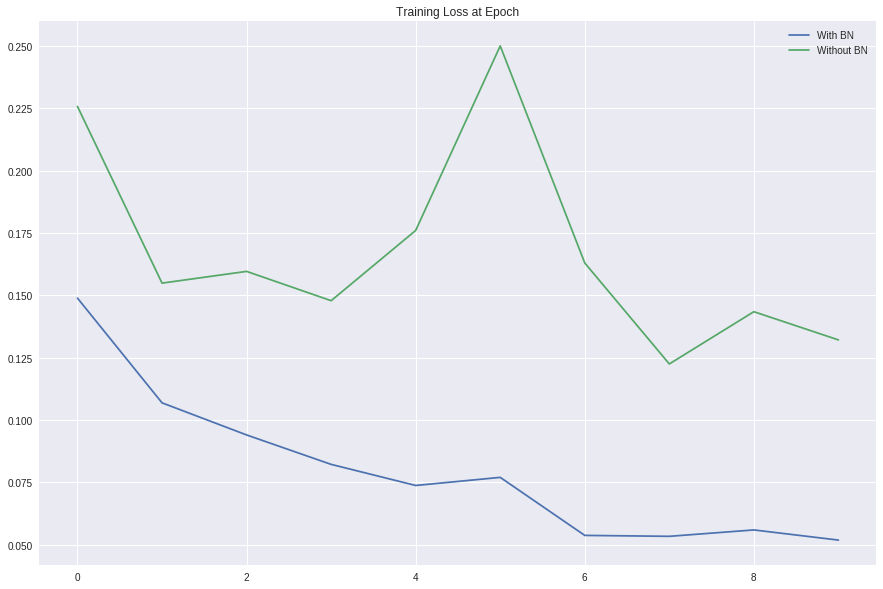

In [88]:
plot_compare(train_losses, title='Training Loss at Epoch')

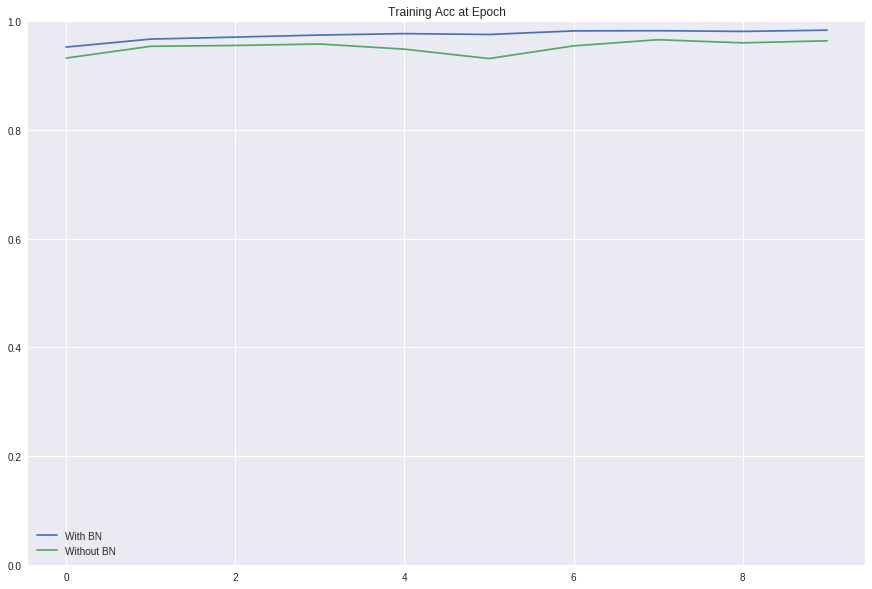

In [89]:
plot_compare(train_accs, [0, 1.0], title="Training Acc at Epoch")

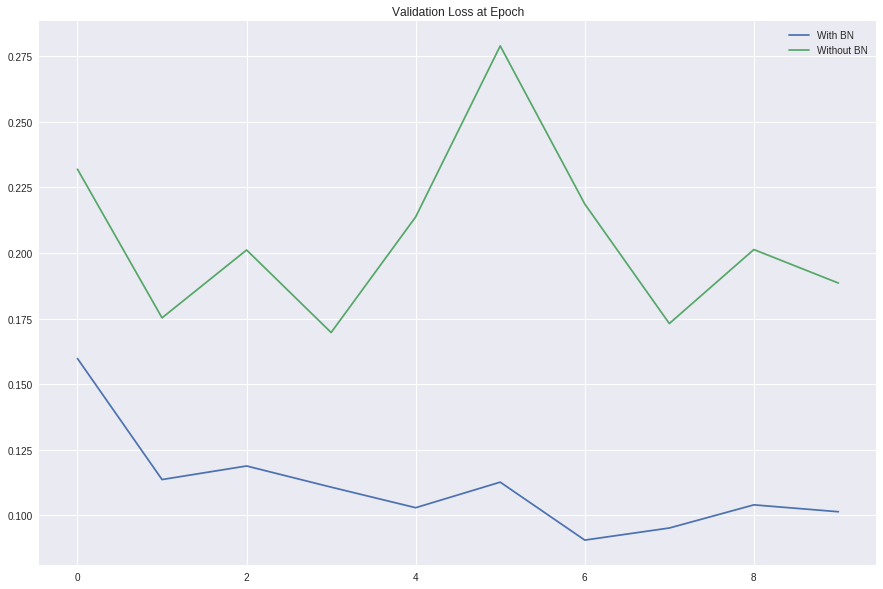

In [90]:
plot_compare(valid_losses, title='Validation Loss at Epoch')

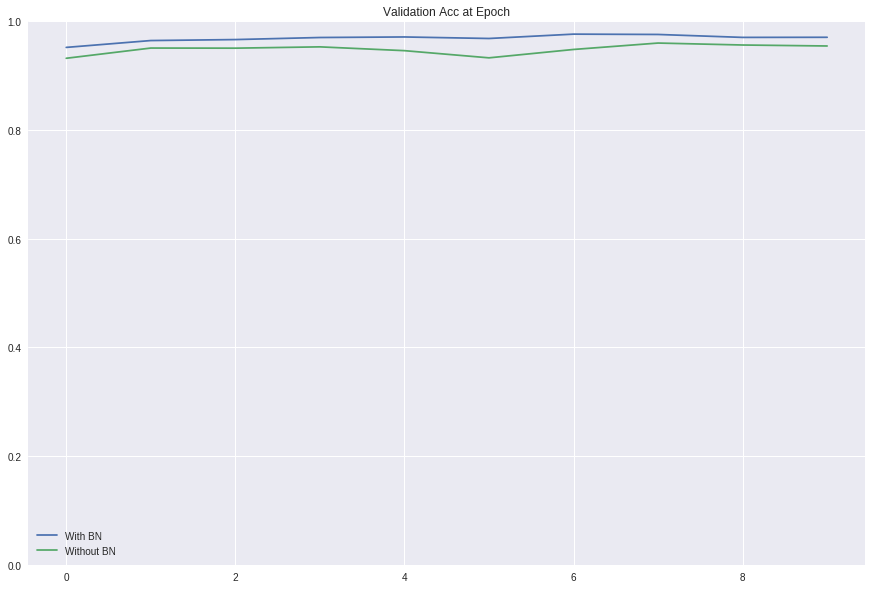

In [91]:
plot_compare(valid_accs, [0, 1.], title='Validation Acc at Epoch')

In [99]:
#lab-10-7-mnist_nn_higher_level_API
# Lab 10 MNIST and High-level TF API
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.01  # we can use large learning rate using Batch Normalization
training_epochs = 15
batch_size = 100
keep_prob = 0.7

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
train_mode = tf.placeholder(tf.bool, name='train_mode')

# layer output size
hidden_output_size = 512
final_output_size = 10

xavier_init = tf.contrib.layers.xavier_initializer()
bn_params = {
    'is_training': train_mode,
    'decay': 0.9,
    'updates_collections': None
}

# We can build short code using 'arg_scope' to avoid duplicate code
# same function with different arguments
with arg_scope([fully_connected],
               activation_fn=tf.nn.relu,
               weights_initializer=xavier_init,
               biases_initializer=None,
               normalizer_fn=batch_norm,
               normalizer_params=bn_params
               ):
    hidden_layer1 = fully_connected(X, hidden_output_size, scope="h1")
    h1_drop = dropout(hidden_layer1, keep_prob, is_training=train_mode)
    hidden_layer2 = fully_connected(h1_drop, hidden_output_size, scope="h2")
    h2_drop = dropout(hidden_layer2, keep_prob, is_training=train_mode)
    hidden_layer3 = fully_connected(h2_drop, hidden_output_size, scope="h3")
    h3_drop = dropout(hidden_layer3, keep_prob, is_training=train_mode)
    hidden_layer4 = fully_connected(h3_drop, hidden_output_size, scope="h4")
    h4_drop = dropout(hidden_layer4, keep_prob, is_training=train_mode)
    hypothesis = fully_connected(h4_drop, final_output_size, activation_fn=None, scope="hypothesis")


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict_train = {X: batch_xs, Y: batch_ys, train_mode: True}
        feed_dict_cost = {X: batch_xs, Y: batch_ys, train_mode: False}
        opt = sess.run(optimizer, feed_dict=feed_dict_train)
        c = sess.run(cost, feed_dict=feed_dict_cost)
        avg_cost += c / total_batch

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost))
    #print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, train_mode: False}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], train_mode: False}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
[Epoch:    1] cost = 0.519417209
[Epoch:    2] cost = 0.432551052
[Epoch:    3] cost = 0.404978843
[Epoch:    4] cost = 0.392039919
[Epoch:    5] cost = 0.382165317
[Epoch:    6] cost = 0.377987834
[Epoch:    7] cost = 0.372577601
[Epoch:    8] cost = 0.367208552
[Epoch:    9] cost = 0.365525589
[Epoch:   10] cost = 0.361964276
[Epoch:   11] cost = 0.359540287
[Epoch:   12] cost = 0.356423751
[Epoch:   13] cost = 0.354478216
[Epoch:   14] cost = 0.353212552
[Epoch:   15] cost = 0.35230893
Learning Finished!
Accuracy: 0.9826
'''


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
[Epoch:    1] cost = 0.396069496
[Epoch:    2] cost = 0.331687726
[Epoch:    3] cost = 0.321508852
[Epoch:    4] cost = 0.316272546
[Epoch:    5] cost = 0.312628802
[Epoch:    6] cost = 0.308758429
[Epoch:    7] cost = 0.307856245
[Epoch:    8] cost = 0.306278852
[Epoch:    9] cost = 0.306042405
[Epoch:   10] cost = 0.30385506
[Epoch:   11] cost = 0.302697073
[Epoch:   12] cost = 0.30156111
[Epoch:   13] cost = 0.302308731
[Epoch:   14] cost = 0.30161054
[Epoch:   15] cost = 0.301485371
Learning Finished!
Accuracy: 0.9843
Label:  [0]
Prediction:  [0]


'\n[Epoch:    1] cost = 0.519417209\n[Epoch:    2] cost = 0.432551052\n[Epoch:    3] cost = 0.404978843\n[Epoch:    4] cost = 0.392039919\n[Epoch:    5] cost = 0.382165317\n[Epoch:    6] cost = 0.377987834\n[Epoch:    7] cost = 0.372577601\n[Epoch:    8] cost = 0.367208552\n[Epoch:    9] cost = 0.365525589\n[Epoch:   10] cost = 0.361964276\n[Epoch:   11] cost = 0.359540287\n[Epoch:   12] cost = 0.356423751\n[Epoch:   13] cost = 0.354478216\n[Epoch:   14] cost = 0.353212552\n[Epoch:   15] cost = 0.35230893\nLearning Finished!\nAccuracy: 0.9826\n'

In [0]:
 #lab-10-8-mnist_nn_selu(wip)
# Lab 10 MNIST and Dropout
# SELU implementation from https://github.com/bioinf-jku/SNNs/blob/master/selu.py
import tensorflow as tf
import random
# import matplotlib.pyplot as plt
# -*- coding: utf-8 -*-
'''
Tensorflow Implementation of the Scaled ELU function and Dropout
'''

import numbers
from tensorflow.contrib import layers
from tensorflow.python.framework import ops
from tensorflow.python.framework import tensor_shape
from tensorflow.python.framework import tensor_util
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import random_ops
from tensorflow.python.ops import array_ops
from tensorflow.python.layers import utils

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

def selu(x):
    with ops.name_scope('elu') as scope:
        alpha = 1.6732632423543772848170429916717
        scale = 1.0507009873554804934193349852946
        return scale*tf.where(x>=0.0, x, alpha*tf.nn.elu(x))


def dropout_selu(x, keep_prob, alpha= -1.7580993408473766, fixedPointMean=0.0, fixedPointVar=1.0,
                 noise_shape=None, seed=None, name=None, training=False):
    """Dropout to a value with rescaling."""

    def dropout_selu_impl(x, rate, alpha, noise_shape, seed, name):
        keep_prob = 1.0 - rate
        x = ops.convert_to_tensor(x, name="x")
        if isinstance(keep_prob, numbers.Real) and not 0 < keep_prob <= 1:
            raise ValueError("keep_prob must be a scalar tensor or a float in the "
                                             "range (0, 1], got %g" % keep_prob)
        keep_prob = ops.convert_to_tensor(keep_prob, dtype=x.dtype, name="keep_prob")
        keep_prob.get_shape().assert_is_compatible_with(tensor_shape.scalar())

        alpha = ops.convert_to_tensor(alpha, dtype=x.dtype, name="alpha")
        keep_prob.get_shape().assert_is_compatible_with(tensor_shape.scalar())

        if tensor_util.constant_value(keep_prob) == 1:
            return x

        noise_shape = noise_shape if noise_shape is not None else array_ops.shape(x)
        random_tensor = keep_prob
        random_tensor += random_ops.random_uniform(noise_shape, seed=seed, dtype=x.dtype)
        binary_tensor = math_ops.floor(random_tensor)
        ret = x * binary_tensor + alpha * (1-binary_tensor)

        a = tf.sqrt(fixedPointVar / (keep_prob *((1-keep_prob) * tf.pow(alpha-fixedPointMean,2) + fixedPointVar)))

        b = fixedPointMean - a * (keep_prob * fixedPointMean + (1 - keep_prob) * alpha)
        ret = a * ret + b
        ret.set_shape(x.get_shape())
        return ret

    with ops.name_scope(name, "dropout", [x]) as name:
        return utils.smart_cond(training,
                                lambda: dropout_selu_impl(x, keep_prob, alpha, noise_shape, seed, name),
                                lambda: array_ops.identity(x))

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 50
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = selu(tf.matmul(X, W1) + b1)
L1 = dropout_selu(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = selu(tf.matmul(L1, W2) + b2)
L2 = dropout_selu(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = selu(tf.matmul(L2, W3) + b3)
L3 = dropout_selu(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = selu(tf.matmul(L3, W4) + b4)
L4 = dropout_selu(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
Epoch: 0001 cost = 0.447322626
Epoch: 0002 cost = 0.157285590
Epoch: 0003 cost = 0.121884535
Epoch: 0004 cost = 0.098128681
Epoch: 0005 cost = 0.082901778
Epoch: 0006 cost = 0.075337573
Epoch: 0007 cost = 0.069752543
Epoch: 0008 cost = 0.060884363
Epoch: 0009 cost = 0.055276413
Epoch: 0010 cost = 0.054631256
Epoch: 0011 cost = 0.049675195
Epoch: 0012 cost = 0.049125314
Epoch: 0013 cost = 0.047231930
Epoch: 0014 cost = 0.041290121
Epoch: 0015 cost = 0.043621063
Learning Finished!
Accuracy: 0.9804
'''


In [0]:
#lab-10-X1-mnist_back_prop
# http://blog.aloni.org/posts/backprop-with-tensorflow/
# https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.b3rvzhx89
import tensorflow as tf

tf.set_random_seed(777)  # reproducibility

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

w1 = tf.Variable(tf.truncated_normal([784, 30]))
b1 = tf.Variable(tf.truncated_normal([1, 30]))
w2 = tf.Variable(tf.truncated_normal([30, 10]))
b2 = tf.Variable(tf.truncated_normal([1, 10]))


def sigma(x):
    #  sigmoid function
    return tf.div(tf.constant(1.0),
                  tf.add(tf.constant(1.0), tf.exp(-x)))


def sigma_prime(x):
    # derivative of the sigmoid function
    return sigma(x) * (1 - sigma(x))

# Forward prop
l1 = tf.add(tf.matmul(X, w1), b1)
a1 = sigma(l1)
l2 = tf.add(tf.matmul(a1, w2), b2)
y_pred = sigma(l2)

# diff
assert y_pred.shape.as_list() == Y.shape.as_list()
diff = (y_pred - Y)


# Back prop (chain rule)
d_l2 = diff * sigma_prime(l2)
d_b2 = d_l2
d_w2 = tf.matmul(tf.transpose(a1), d_l2)

d_a1 = tf.matmul(d_l2, tf.transpose(w2))
d_l1 = d_a1 * sigma_prime(l1)
d_b1 = d_l1
d_w1 = tf.matmul(tf.transpose(X), d_l1)


# Updating network using gradients
learning_rate = 0.5
step = [
    tf.assign(w1, w1 - learning_rate * d_w1),
    tf.assign(b1, b1 - learning_rate *
              tf.reduce_mean(d_b1, reduction_indices=[0])),
    tf.assign(w2, w2 - learning_rate * d_w2),
    tf.assign(b2, b2 - learning_rate *
              tf.reduce_mean(d_b2, reduction_indices=[0]))
]

# 7. Running and testing the training process
acct_mat = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
acct_res = tf.reduce_sum(tf.cast(acct_mat, tf.float32))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(10)
    sess.run(step, feed_dict={X: batch_xs,
                              Y: batch_ys})
    if i % 1000 == 0:
        res = sess.run(acct_res, feed_dict={X: mnist.test.images[:1000],
                                            Y: mnist.test.labels[:1000]})
        print(res)

# 8. Automatic differentiation in TensorFlow
cost = diff * diff
step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)


# Lab 11-1 cnn basics

In [1]:
# Lab 10 MNIST and Deep learning CNN
# lab-11-X-mnist_cnn_low_memory.py

import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''

# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3 = tf.reshape(L3, [-1, 128 * 4 * 4])
'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning stared. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def evaluate(X_sample, y_sample, batch_size=512):
    """Run a minibatch accuracy op"""

    N = X_sample.shape[0]
    correct_sample = 0

    for i in range(0, N, batch_size):
        X_batch = X_sample[i: i + batch_size]
        y_batch = y_sample[i: i + batch_size]
        N_batch = X_batch.shape[0]

        feed = {
            X: X_batch,
            Y: y_batch,
            keep_prob: 1
        }

        correct_sample += sess.run(accuracy, feed_dict=feed) * N_batch

    return correct_sample / N

print("\nAccuracy Evaluates")
print("-------------------------------")
print('Train Accuracy:', evaluate(mnist.train.images, mnist.train.labels))
print('Test Accuracy:', evaluate(mnist.test.images, mnist.test.labels))


# Get one and predict
print("\nGet one and predict")
print("-------------------------------")
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), {X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
Learning stared. It takes sometime.
Epoch: 0001 cost = 0.385748474
Epoch: 0002 cost = 0.092017397
Epoch: 0003 cost = 0.065854684
Epoch: 0004 cost = 0.055604566
Epoch: 0005 cost = 0.045996377
Epoch: 0006 cost = 0.040913645
Epoch: 0007 cost = 0.036924479
Epoch: 0008 cost = 0.032808939
Epoch: 0009 cost = 0.031791007
Epoch: 0010 cost = 0.030224456
Epoch: 0011 cost = 0.026849916
Epoch: 0012 cost = 0.026826763
Epoch: 0013 cost = 0.027188021
Epoch: 0014 cost = 0.023604777
Epoch: 0015 cost = 0.024607201
Learning Finished!
Accuracy: 0.9938
'''


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Learning stared. It takes sometime.
Epoch: 0001 cost = 0.371506178
Epoch: 0002 cost = 0.101555878
Epoch: 0003 

KeyboardInterrupt: ignored

(1, 3, 3, 1)


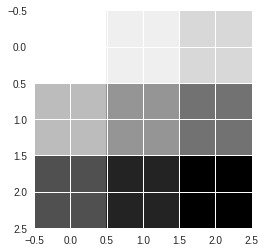

In [2]:
#  lab-11-0-cnn_basics

%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

## 1 filter (2,2,1,1) with padding: VALID
###weight.shape = 1 filter (2 , 2 , 1, 1)
![image](https://cloud.githubusercontent.com/assets/901975/24833375/c0d9c262-1cf9-11e7-9efc-5dd6fe0fedb0.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


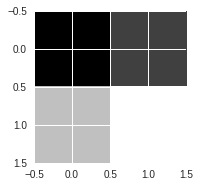

In [5]:
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

## 1 filter (2,2,1,1) with padding:SAME
![image](https://cloud.githubusercontent.com/assets/901975/24833381/fd01869e-1cf9-11e7-9d59-df08c7c6e5c4.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


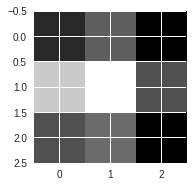

In [6]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [0]:
# 3 filters (2,2,1,3)

# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## MAX POOLING
![image](https://cloud.githubusercontent.com/assets/901975/23337676/bd154da2-fc30-11e6-888c-d86bc2206066.png)

![image](https://cloud.githubusercontent.com/assets/901975/23340355/a4bd3c08-fc6f-11e6-8a99-1e3bbbe86733.png)


In [7]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[4.]]]]


## SAME: Zero paddings

![image](https://cloud.githubusercontent.com/assets/901975/23340337/71b27652-fc6f-11e6-96ef-760998755f77.png)

In [8]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


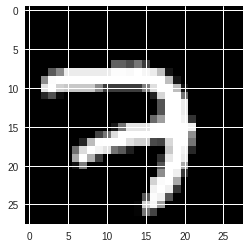

In [10]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_5:0", shape=(1, 14, 14, 5), dtype=float32)


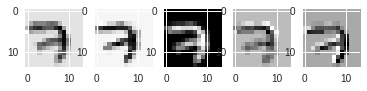

In [11]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_5:0", shape=(1, 7, 7, 5), dtype=float32)


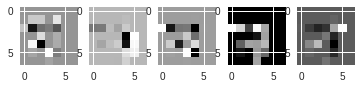

In [12]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

# Lab 11-2 mnist 99% with cnn

In [13]:
# Lab 11 MNIST and Convolutional Neural Network
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
'''

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])  # fc 에 넣기위해 펼침
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)
'''

# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
Epoch: 0001 cost = 0.340291267
Epoch: 0002 cost = 0.090731326
Epoch: 0003 cost = 0.064477619
Epoch: 0004 cost = 0.050683064
Epoch: 0005 cost = 0.041864835
Epoch: 0006 cost = 0.035760704
Epoch: 0007 cost = 0.030572132
Epoch: 0008 cost = 0.026207981
Epoch: 0009 cost = 0.022622454
Epoch: 0010 cost = 0.019055919
Epoch: 0011 cost = 0.017758641
Epoch: 0012 cost = 0.014156652
Epoch: 0013 cost = 0.012397016
Epoch: 0014 cost = 0.010693789
Epoch: 0015 cost = 0.009469977
Learning Finished!
Accuracy: 0.9885
'''


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning started. It takes sometime.
Epoch: 0001 cost = 0.355937576
Epoch: 0002 cost = 0.102328722
Epoch: 0003 cost = 0.073677888
Epoch: 0004 cost = 0.060485768
Epoch: 0005 cost = 0.050607250


KeyboardInterrupt: ignored

In [0]:
# Lab 11-2 MNIST and Deep learning CNN  더 깊음.
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''

# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''

# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy

# if you have a OOM error, please refer to lab-11-X-mnist_deep_cnn_low_memory.py

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

# plt.imshow(mnist.test.images[r:r + 1].
#           reshape(28, 28), cmap='Greys', interpolation='nearest')
# plt.show()

'''
Learning stared. It takes sometime.
Epoch: 0001 cost = 0.385748474
Epoch: 0002 cost = 0.092017397
Epoch: 0003 cost = 0.065854684
Epoch: 0004 cost = 0.055604566
Epoch: 0005 cost = 0.045996377
Epoch: 0006 cost = 0.040913645
Epoch: 0007 cost = 0.036924479
Epoch: 0008 cost = 0.032808939
Epoch: 0009 cost = 0.031791007
Epoch: 0010 cost = 0.030224456
Epoch: 0011 cost = 0.026849916
Epoch: 0012 cost = 0.026826763
Epoch: 0013 cost = 0.027188021
Epoch: 0014 cost = 0.023604777
Epoch: 0015 cost = 0.024607201
Learning Finished!
Accuracy: 0.9938
'''

# Lab 11-3 cnn class, layers, ensemble

In [0]:
# Lab 11-3 MNIST and Deep learning CNN
import tensorflow as tf
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100


class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.keep_prob = tf.placeholder(tf.float32)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])
            # img 28x28x1 (black/white)
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # L1 ImgIn shape=(?, 28, 28, 1)
            W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
            #    Conv     -> (?, 28, 28, 32)
            #    Pool     -> (?, 14, 14, 32)
            L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)
            '''
            Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
            Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
            Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
            Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
            '''

            # L2 ImgIn shape=(?, 14, 14, 32)
            W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            #    Conv      ->(?, 14, 14, 64)
            #    Pool      ->(?, 7, 7, 64)
            L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1], padding='SAME')
            L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)
            '''
            Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
            Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
            Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
            Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
            '''

            # L3 ImgIn shape=(?, 7, 7, 64)
            W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            #    Conv      ->(?, 7, 7, 128)
            #    Pool      ->(?, 4, 4, 128)
            #    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
            L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
            L3 = tf.nn.relu(L3)
            L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                                1, 2, 2, 1], padding='SAME')
            L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)

            L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
            '''
            Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
            Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
            Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
            Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
            Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
            '''

            # L4 FC 4x4x128 inputs -> 625 outputs
            W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b4 = tf.Variable(tf.random_normal([625]))
            L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
            L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)
            '''
            Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
            Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
            '''

            # L5 Final FC 625 inputs -> 10 outputs
            W5 = tf.get_variable("W5", shape=[625, 10],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(L4, W5) + b5
            '''
            Tensor("add_1:0", shape=(?, 10), dtype=float32)
            '''

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, keep_prop=1.0):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.keep_prob: keep_prop})

    def get_accuracy(self, x_test, y_test, keep_prop=1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.keep_prob: keep_prop})

    def train(self, x_data, y_data, keep_prop=0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})

# initialize
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys) ########################################
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))


In [0]:
# Lab 11-4 MNIST and Deep learning CNN   with tf.layers
import tensorflow as tf
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100


class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3],
                                     padding="same", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                                            padding="same", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3,
                                         rate=0.3, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat,
                                     units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4,
                                         rate=0.5, training=self.training)

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

# initialize
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))


In [0]:
# Lab 11-5 MNIST and Deep learning CNN  Ensemble
# https://www.tensorflow.org/tutorials/layers
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100


class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #3 and Pooling Layer #3
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3,
                                         rate=0.3, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat,
                                     units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4,
                                         rate=0.5, training=self.training)

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

# initialize
sess = tf.Session()

models = []
num_models = 2  ## 7
for m in range(num_models):
    models.append(Model(sess, "model" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

# Test model and check accuracy
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy:', m.get_accuracy(mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p   # predictions  은 각 n개 모델이 계산한 합을 저장.

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

'''
0 Accuracy: 0.9933
1 Accuracy: 0.9946
2 Accuracy: 0.9934
3 Accuracy: 0.9935
4 Accuracy: 0.9935
5 Accuracy: 0.9949
6 Accuracy: 0.9941

Ensemble accuracy: 0.9952

deep, wide
cifar 10
image Net
'''


# Lab 12-1 rnn basics

In [0]:
# http://www.wildml.com/2016/08/rnns-in-tensorflow-a-practical-guide-and-undocumented-features/
# http://learningtensorflow.com/index.html
# http://suriyadeepan.github.io/2016-12-31-practical-seq2seq/

import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import pprint
pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()

In [0]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]



![image](https://cloud.githubusercontent.com/assets/901975/23348727/cc981856-fce7-11e6-83ea-4b187473466b.png)


In [4]:
with tf.variable_scope('one_cell') as scope:
    # One cell RNN input_dim (4) -> output_dim (2)
    hidden_size = 2
    cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)
    print(cell.output_size, cell.state_size)

    x_data = np.array([[h]], dtype=np.float32) # x_data = [[[1,0,0,0]]]
    pp.pprint(x_data)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)

    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())


2 2
array([[[1., 0., 0., 0.]]], dtype=float32)
array([[[-0.29140112,  0.5849514 ]]], dtype=float32)


![image](https://cloud.githubusercontent.com/assets/901975/23383634/649efd0a-fd82-11e6-925d-8041242743b0.png)

In [5]:
with tf.variable_scope('two_sequances') as scope:
    # One cell RNN input_dim (4) -> output_dim (2). sequence: 5
    hidden_size = 2
    cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)
    x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
    print(x_data.shape)
    pp.pprint(x_data)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

(1, 5, 4)
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]], dtype=float32)
array([[[-0.07654915, -0.3855424 ],
        [-0.49560276, -0.6708315 ],
        [ 0.6857822 , -0.7646933 ],
        [-0.05219784, -0.33482087],
        [-0.5580929 , -0.03570732]]], dtype=float32)


In [6]:
with tf.variable_scope('3_batches') as scope:
    # One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
    # 3 batches 'hello', 'eolll', 'lleel'
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)
    
    hidden_size = 2
    cell = rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(
        cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
array([[[-0.05568239,  0.0848114 ],
        [-0.110227  ,  0.13545384],
        [-0.1059625 , -0.07497339],
        [-0.12791564, -0.22861028],
        [-0.19016574, -0.21736827]],

       [[-0.07450447,  0.08766329],
        [-0.11305872, -0.03049532],
        [-0.10891713, -0.20595554],
        [-0.12751703, -0.29558137],
        [-0.13648033, -0.349099

In [7]:
# Create input data
batch_size=3
sequence_length=5
input_dim=3

x_data = np.arange(45, dtype=np.float32).reshape(batch_size, sequence_length, input_dim)
pp.pprint(x_data)  # batch, sequence_length, input_dim

array([[[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]],

       [[15., 16., 17.],
        [18., 19., 20.],
        [21., 22., 23.],
        [24., 25., 26.],
        [27., 28., 29.]],

       [[30., 31., 32.],
        [33., 34., 35.],
        [36., 37., 38.],
        [39., 40., 41.],
        [42., 43., 44.]]], dtype=float32)


In [8]:
with tf.variable_scope('generated_data') as scope:
    # One cell RNN input_dim (3) -> output_dim (5). sequence: 5, batch: 3
    cell = rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)
    initial_state = cell.zero_state(batch_size, tf.float32)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data,
                                         initial_state=initial_state, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[ 3.6150053e-02,  2.3520403e-01, -3.2547012e-02,  1.5964058e-01,
          2.5103199e-01],
        [-1.6611762e-01,  6.2629008e-01, -3.4864206e-02,  5.7054096e-01,
          5.5541092e-01],
        [-4.4524059e-01,  8.0021358e-01, -9.8787462e-03,  7.1334428e-01,
          6.2946588e-01],
        [-6.6816425e-01,  8.3598906e-01, -1.9461070e-03,  7.1446979e-01,
          6.1350924e-01],
        [-8.1078768e-01,  8.2220370e-01, -3.5803381e-04,  7.0069486e-01,
          6.0331732e-01]],

       [[-2.9014570e-01,  7.5340521e-01, -1.0358278e-04,  5.9542876e-01,
          5.9072948e-01],
        [-5.4975271e-01,  7.8075004e-01, -1.2408715e-05,  6.8257451e-01,
          5.8662140e-01],
        [-7.3185641e-01,  7.7397186e-01, -2.5018815e-06,  6.9442165e-01,
          5.9810346e-01],
        [-8.4457177e-01,  7.6862878e-01, -4.9722274e-07,  7.0186847e-01,
          6.1030453e-01],
        [-9.1038817e-01,  7.6554227e-01, -9.8272970e-08,  7.0784974e-01,
          6.1952573e-01]],

      

In [9]:
with tf.variable_scope('MultiRNNCell') as scope:
    # Make rnn
    cell = rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)
    cell = rnn.MultiRNNCell([cell] * 3, state_is_tuple=True) # 3 layers

    # rnn in/out
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    print("dynamic rnn: ", outputs)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())  # batch size, unrolling (time), hidden_size

ValueError: ignored

In [11]:
# flattern based softmax
hidden_size=3
sequence_length=5
batch_size=3
num_classes=5

pp.pprint(x_data) # hidden_size=3, sequence_length=4, batch_size=2
x_data = x_data.reshape(-1, hidden_size)
pp.pprint(x_data)

softmax_w = np.arange(15, dtype=np.float32).reshape(hidden_size, num_classes)
outputs = np.matmul(x_data, softmax_w)
outputs = outputs.reshape(-1, sequence_length, num_classes) # batch, seq, class
pp.pprint(outputs)

array([[[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.],
        [12., 13., 14.]],

       [[15., 16., 17.],
        [18., 19., 20.],
        [21., 22., 23.],
        [24., 25., 26.],
        [27., 28., 29.]],

       [[30., 31., 32.],
        [33., 34., 35.],
        [36., 37., 38.],
        [39., 40., 41.],
        [42., 43., 44.]]], dtype=float32)
array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.],
       [12., 13., 14.],
       [15., 16., 17.],
       [18., 19., 20.],
       [21., 22., 23.],
       [24., 25., 26.],
       [27., 28., 29.],
       [30., 31., 32.],
       [33., 34., 35.],
       [36., 37., 38.],
       [39., 40., 41.],
       [42., 43., 44.]], dtype=float32)
array([[[  25.,   28.,   31.,   34.,   37.],
        [  70.,   82.,   94.,  106.,  118.],
        [ 115.,  136.,  157.,  178.,  199.],
        [ 160.,  190.,  220.,  250.,  280.],
        [ 205.,  244.,  283.,  322.,  361.]],

 

In [12]:
# [batch_size, sequence_length]   ???????????????????????
y_data = tf.constant([[1, 1, 1]])

# [batch_size, sequence_length, emb_dim ]
prediction = tf.constant([[[0.2, 0.7], [0.6, 0.2], [0.2, 0.9]]], dtype=tf.float32)

# [batch_size * sequence_length]
weights = tf.constant([[1, 1, 1]], dtype=tf.float32)

sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=prediction, targets=y_data, weights=weights)
sess.run(tf.global_variables_initializer())
print("Loss: ", sequence_loss.eval())

Loss:  0.5967595


In [13]:
# [batch_size, sequence_length]   ???????????
y_data = tf.constant([[1, 1, 1]])

# [batch_size, sequence_length, emb_dim ]
prediction1 = tf.constant([[[0.3, 0.7], [0.3, 0.7], [0.3, 0.7]]], dtype=tf.float32)
prediction2 = tf.constant([[[0.1, 0.9], [0.1, 0.9], [0.1, 0.9]]], dtype=tf.float32)

prediction3 = tf.constant([[[1, 0], [1, 0], [1, 0]]], dtype=tf.float32)
prediction4 = tf.constant([[[0, 1], [1, 0], [0, 1]]], dtype=tf.float32)

# [batch_size * sequence_length]
weights = tf.constant([[1, 1, 1]], dtype=tf.float32)

sequence_loss1 = tf.contrib.seq2seq.sequence_loss(prediction1, y_data, weights)
sequence_loss2 = tf.contrib.seq2seq.sequence_loss(prediction2, y_data, weights)
sequence_loss3 = tf.contrib.seq2seq.sequence_loss(prediction3, y_data, weights)
sequence_loss4 = tf.contrib.seq2seq.sequence_loss(prediction3, y_data, weights)

sess.run(tf.global_variables_initializer())
print("Loss1: ", sequence_loss1.eval(),
      "Loss2: ", sequence_loss2.eval(),
      "Loss3: ", sequence_loss3.eval(),
      "Loss4: ", sequence_loss4.eval())

Loss1:  0.5130153 Loss2:  0.3711007 Loss3:  1.3132616 Loss4:  1.3132616


# Lab 12-2 rnn hi hello training


In [0]:
# Lab 12 RNN
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # reproducibility

idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3

y_data = [[1, 0, 2, 3, 3, 4]]    # ihello

num_classes = 5
input_dim = 5  # one-hot size
hidden_size = 5  # output from the LSTM. 5 to directly predict one-hot
batch_size = 1   # one sentence
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

X = tf.placeholder(
    tf.float32, [None, sequence_length, input_dim])  # X one-hot
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, X, initial_state=initial_state, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
# fc_w = tf.get_variable("fc_w", [hidden_size, num_classes])
# fc_b = tf.get_variable("fc_b", [num_classes])
# outputs = tf.matmul(X_for_fc, fc_w) + fc_b
outputs = tf.contrib.layers.fully_connected(
    inputs=X_for_fc, num_outputs=num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        print(i, "loss:", l, "prediction: ", result, "true Y: ", y_data)

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print("\tPrediction str: ", ''.join(result_str))

'''
0 loss: 1.71584 prediction:  [[2 2 2 3 3 2]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  eeelle
1 loss: 1.56447 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
2 loss: 1.46284 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
3 loss: 1.38073 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
4 loss: 1.30603 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
5 loss: 1.21498 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
6 loss: 1.1029 prediction:  [[3 0 3 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  lhlllo
7 loss: 0.982386 prediction:  [[1 0 3 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihlllo
8 loss: 0.871259 prediction:  [[1 0 3 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihlllo
9 loss: 0.774338 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
10 loss: 0.676005 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello

...

'''


# Lab 12-3 long sequence rnn

In [0]:
# Lab 12 Character Sequence RNN
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # reproducibility

sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

x_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, x_one_hot, initial_state=initial_state, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]

        print(i, "loss:", l, "Prediction:", ''.join(result_str))


'''
0 loss: 2.35377 Prediction: uuuuuuuuuuuuuuu
1 loss: 2.21383 Prediction: yy you y    you
2 loss: 2.04317 Prediction: yy yoo       ou
3 loss: 1.85869 Prediction: yy  ou      uou
4 loss: 1.65096 Prediction: yy you  a   you
5 loss: 1.40243 Prediction: yy you yan  you
6 loss: 1.12986 Prediction: yy you wann you
7 loss: 0.907699 Prediction: yy you want you
8 loss: 0.687401 Prediction: yf you want you
9 loss: 0.508868 Prediction: yf you want you
10 loss: 0.379423 Prediction: yf you want you
11 loss: 0.282956 Prediction: if you want you
12 loss: 0.208561 Prediction: if you want you

...

'''


# Lab 12-4 stacked rnn, softmax layer

In [0]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn

tf.set_random_seed(777)  # reproducibility

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

# One-hot encoding
X_one_hot = tf.one_hot(X, num_classes)
print(X_one_hot)  # check out the shape


# Make a lstm cell with hidden_size (each unit output vector size)
def lstm_cell():
    cell = rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
    return cell

multi_cells = rnn.MultiRNNCell([lstm_cell() for _ in range(2)], state_is_tuple=True)

# outputs: unfolding size x hidden size, state = hidden size
outputs, _states = tf.nn.dynamic_rnn(multi_cells, X_one_hot, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])
"""
X_for_softmax = tf.reshape(outputs, [-1, hidden_size])

softmax_w = tf.get_variable("softmax_w", [hidden_size, num_classes])
softmax_b = tf.get_variable("softmax_b", [num_classes])
outputs = tf.matmul(X_for_softmax, softmax_w) + softmax_b

outputs = tf.reshape(outputs, [batch_size, seq_length, num_classes])
"""
# All weights are 1 (equal weights)
weights = tf.ones([batch_size, sequence_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
mean_loss = tf.reduce_mean(sequence_loss)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mean_loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(500):
    _, l, results = sess.run(
        [train_op, mean_loss, outputs], feed_dict={X: dataX, Y: dataY})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
        print(i, j, ''.join([char_set[t] for t in index]), l)

# Let's print the last char of each result to check it works
results = sess.run(outputs, feed_dict={X: dataX})
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

'''
0 167 tttttttttt 3.23111
0 168 tttttttttt 3.23111
0 169 tttttttttt 3.23111
…
499 167  of the se 0.229616
499 168 tf the sea 0.229616
499 169   the sea. 0.229616

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.

'''


# Lab 12-5 dynamic rnn

In [0]:
with tf.variable_scope('dynamic_rnn') as scope:
    cell = rnn.BasicLSTMCell(num_units=5, state_is_tuple=True)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32,
                                         sequence_length=[1, 3, 2])
    # lentgh 1 for batch 1, lentgh 2 for batch 2
    
    print("dynamic rnn: ", outputs)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())  # batch size, unrolling (time), hidden_size
    
    
    

# Lab 12-6 rnn with time series data

In [0]:
'''
This script shows how to predict stock prices using a basic RNN
'''
import tensorflow as tf
import numpy as np
import matplotlib
import os

tf.set_random_seed(777)  # reproducibility

if "DISPLAY" not in os.environ:
    # remove Travis CI Error
    matplotlib.use('Agg')

import matplotlib.pyplot as plt


def MinMaxScaler(data):
    ''' Min Max Normalization

    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]

    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]

    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={
                                X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()
